In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Import dataset into dataframe
ca_fire_data = pd.read_csv('Resources/CA_Fires.csv', parse_dates=['DISCOVERY_DATE', 'CONT_DATE'], dtype={'FIRE_YEAR': 'int64', 'LOCAL_INCIDENT_ID': str, 'FIRE_CODE': str, 'COUNTY': str})

# Clean data and create subset
ca_fire_data = ca_fire_data.loc[ca_fire_data['FIRE_YEAR'] > 2000]
top_fires = ca_fire_data.sort_values(['FIRE_YEAR', 'FIRE_SIZE'], ascending=False).groupby('FIRE_YEAR').head(50).reset_index(drop=True)
top_fires = top_fires[['FPA_ID', 'FIRE_YEAR', 'FIRE_NAME', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE']]
top_fires = top_fires.rename(columns={
    'NWCG_CAUSE_CLASSIFICATION': 'CAUSE_CLASS',
    'NWCG_GENERAL_CAUSE': 'GENERAL_CAUSE',
})
top_fires['MONTH'] = ca_fire_data['DISCOVERY_DATE'].dt.month
top_fires

# Save data to csv
top_fires.to_csv('Resources/top_fires.csv', index=False)

In [3]:
# Import final CA fire data
fire_data = pd.read_csv('Resources/top_fires.csv', parse_dates=['DISCOVERY_DATE'])
fire_data

,FPA_ID,FIRE_YEAR,FIRE_NAME,DISCOVERY_DATE,DISCOVERY_DOY,CAUSE_CLASS,GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,MONTH
0,IRW-2020-CAMNF-000730,2020,DOE,2020-08-16,229,Natural,Natural,589368.0,G,39.765255,-122.672914,2
1,IRW-2020-CASCU-005740,2020,SCU LIGHTNING COMPLEX,2020-08-16,229,Missing data/not specified/undetermined,Missing data/not specified/undetermined,396624.0,G,37.423905,-121.567713,5
2,IRW-2020-CASNF-001391,2020,CREEK,2020-09-04,248,Human,Missing data/not specified/undetermined,379895.0,G,37.201005,-119.271613,5
3,IRW-2020-CAMNF-000757,2020,HOPKINS,2020-08-17,230,Natural,Natural,328363.0,G,40.125375,-123.072714,6
4,IRW-2020-CAPNF-001302,2020,CLAREMONT,2020-08-17,230,Natural,Natural,318776.0,G,39.858275,-120.912013,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,FS-368115,2001,SHELBY,2001-07-27,208,Human,Railroad operations and maintenance,720.0,E,34.200000,-117.390000,5
996,W-104079,2001,COWHEAD,2001-08-08,220,Natural,Natural,709.0,E,41.865190,-120.070800,5
997,FWS-2001CAGRRX182,2001,AQUEDUCT,2001-07-01,182,Human,Equipment and vehicle use,700.0,E,37.078663,-120.989141,4
998,SFO-2001CACDFMMU010898,2001,MC NAMMARA,2001-07-01,182,Human,Equipment and vehicle use,700.0,E,37.221944,-120.478889,5


# Average Acreage Burned

* Has the average acreage burned increased or decreased each year?

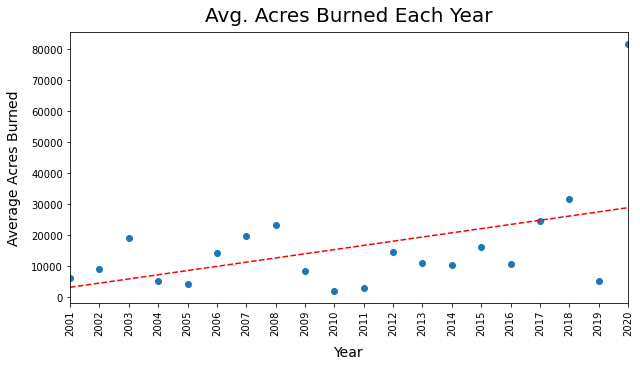

In [4]:
# Generate a scatter plot of year vs. avg acres burned
years = fire_data['FIRE_YEAR'].drop_duplicates().sort_values()
avg_acre = fire_data.groupby('FIRE_YEAR').mean()['FIRE_SIZE']

# Perform a linear regression on year vs. avg acres burned and create equation line
a_slope, a_int, a_r, a_p, a_std_err = stats.linregress(years, avg_acre)
a_fit = a_slope * years + a_int

# Plot the linear model and scatter plot
fig = plt.figure(figsize=(10, 5))
plt.xlim(min(years), max(years))
plt.scatter(years, avg_acre)
plt.plot(years, a_fit, "--", color='red')
plt.xticks(years, rotation=90)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Average Acres Burned", fontsize=14, labelpad=10)
plt.title("Avg. Acres Burned Each Year", fontsize=20, pad=10)
plt.show()

# Which Area is Impacted the Most?
* Northern California?
* Southern California?

In [5]:
norcal_total_acres = fire_data.loc[fire_data['LATITUDE'] >= 37]['FIRE_SIZE'].sum()
socal_total_acres = fire_data.loc[fire_data['LATITUDE'] < 37]['FIRE_SIZE'].sum()

print(f"The total acres burned in Northern California: {round(norcal_total_acres):,}")
print(f"The total acres burned in Southern California: {round(socal_total_acres):,}")

The total acres burned in Northern California: 9,959,282
The total acres burned in Southern California: 6,107,927


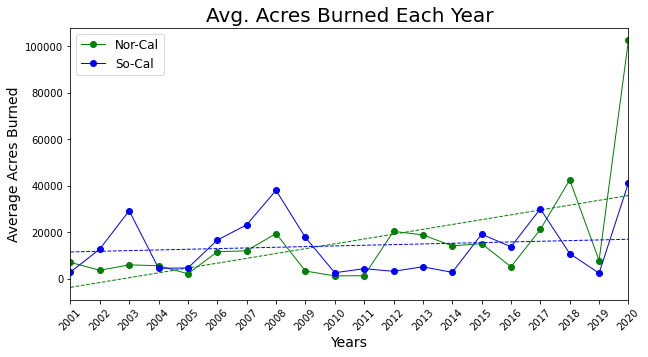

In [6]:
# Create Northern and Southern California data frames
norcal_fires = fire_data.loc[fire_data['LATITUDE'] >= 37]
socal_fires = fire_data.loc[fire_data['LATITUDE'] < 37]

norcal_avg_acre = norcal_fires.groupby('FIRE_YEAR').mean()['FIRE_SIZE']
n_slope, n_int, n_r, n_p, n_std_err = stats.linregress(years, norcal_avg_acre)
n_fit = n_slope * years + n_int

socal_avg_acre = socal_fires.groupby('FIRE_YEAR').mean()['FIRE_SIZE']
s_slope, s_int, s_r, s_p, s_std_err = stats.linregress(years, socal_avg_acre)
s_fit = s_slope * years + s_int

fig, ax1 = plt.subplots(1, sharex=True, figsize=(10, 5))
plt.xticks(years, rotation=45)

ax1.set_xlim(min(years), max(years))
ax1.plot(years, norcal_avg_acre, linewidth=1, marker="o", color='g', label="Nor-Cal")
ax1.plot(years, n_fit, "g--", linewidth=1)

ax1.plot(years, socal_avg_acre, linewidth=1, marker="o", color='b', label="So-Cal")
ax1.plot(years, s_fit, "b--", linewidth=1)

ax1.legend(loc='upper left', fontsize=12)
ax1.set_ylabel("Average Acres Burned", fontsize=14)
ax1.set_xlabel("Years", fontsize=14)
ax1.set_title("Avg. Acres Burned Each Year", fontsize=20)

plt.show()

# Top Causes of Fire for North and South

# Most Prone Area in Northern and Southern

# Most Prone Area Overall

# Any Correlation Between Cause and Acreage Burned

# Any Correlation Between Latitude and Acreage Burned